## TMDb movie database

## Introduction

#### Research Questions: 

In this analysis, I aimed to explore various aspects of the movie industry using a dataset containing information about movies.
To guide my investigation, I have formulated specific research questions that will guide my analysis and provide insights into different facets of the movie industry.

###### 1- What is the relationship between a movie's popularity and its revenue?

This question will help us understand the correlation between a movie's popularity, as indicated by factors such as user ratings, and its revenue. By examining this relationship, we can gain insights into the factors that contribute to a movie's financial success.

###### 2- Do movies produced by certain production companies tend to have higher revenues?

By checking whether certain production companies consistently produce movies with higher revenues, we can assess the impact of production companies on a movie's financial performance. This question will allow us to identify potential patterns or trends in revenue generation across different production companies.

###### 3- How has the average runtime of movies changed over the years?

Examining the average running time of movies over different years will provide insights into the evolution of movie lengths over time. By analyzing this trend, we can identify potential shifts in audience preferences or industry standards regarding movie length.


In [58]:
# Importing the pandas library 
import pandas as pd

# Importing the numpy library
import numpy as np

# Importing the matplotlib library ion
import matplotlib.pyplot as plt

# Ensuring that matplotlib plots display inline within Jupyter Notebooks
%matplotlib inline


## Data Wrangling

In [59]:
# Loading the dataset
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

# Displaying the first five rows of the DataFrame 
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
# Displaying a summary of the DataFrame,
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [61]:
# Checking for missing data 
df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### There are some missing values in several columns

In [62]:
# Dimensions of the DataFrame.
df.shape # Check (rows, columns)

(10866, 21)

#### These data types seem appropriate for the columns based on their possible contents.
BUT release_year int64 : SHOULD BE DATETIME
ALSO release_date object : SHOULD BE DATETIME



### Data Cleaning


In [63]:
### There are some missing values in several columns :

# Function to fill missing values:
def fill_missing_values(df, columns, fill_value):
    for column in columns:
        df[column].fillna(fill_value, inplace=True)
    return df

# List of columns that have missing values.
columns_to_fill = ['cast', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']

# Mapping each column to its fill value
fill_values = {
    'cast': 'Unknown cast',
    'director': 'Unknown director',
    'tagline': 'Unknown tagline',
    'keywords': 'Unknown keywords',
    'overview': 'No provided overview',
    'genres': 'Unknown genres',
    'production_companies': 'Unknown production company'
}

# Iterating loop to fill missing values 
for column, value in fill_values.items():
    df = fill_missing_values(df, [column], value)

In [32]:
# Dropping the 'homepage' and 'imdb_id' columns 
# There is a lot of missing data on these columns, 
#so dropping then is the best

df.drop(columns=['homepage', 'imdb_id'], inplace=True)

In [34]:
# Checking for missing values after dropping rows from any missing values
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [36]:
# Converting the 'release_date' column to datetime format 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year


In [37]:
#### Function to plot bar grahps
def plot_bar(data, title, xlabel, ylabel, figsize=(6, 4)):
    data.plot(kind='bar', figsize=figsize)
     # Adding title, x-label, and y-label to the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Exploratory Data Analysis

#### Research Question 1: What is the relationship between a movie's popularity and its revenue?

Text(0, 0.5, 'Frequancy')

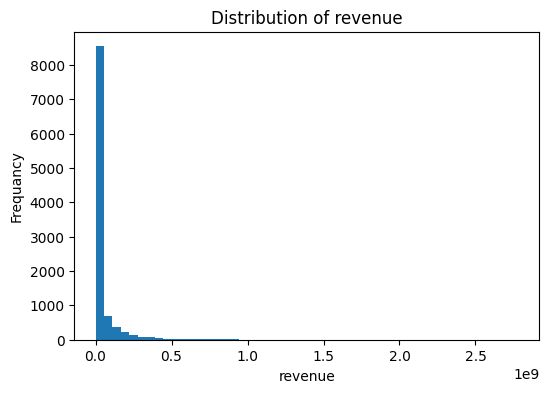

In [57]:
df['revenue'].hist(grid=False, bins = 50,figsize=[6,4])
# Titel of plot
plt.title('Distribution of revenue')
# Titel of x - axis
plt.xlabel('revenue')
# Titel of y - axis
plt.ylabel('Frequancy')

Correlation is: 
0.6633583664517383


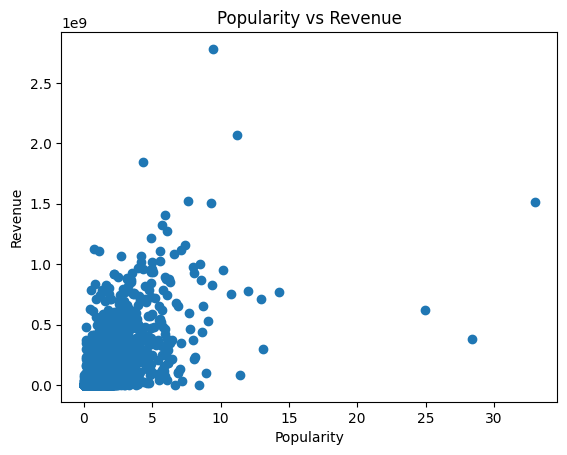

In [108]:
# plot to check relationship , positive, negative or no correlation
plt.scatter(df['popularity'], df['revenue'])

# Titel of plot
plt.title('Popularity vs Revenue')

# Titel of x - axis
plt.xlabel('Popularity')
# Titel of y - axis
plt.ylabel('Revenue')

# calculate correlation of relation 
correlation = np.corrcoef(df['popularity'], df['revenue'])[0, 1]
print("Correlation is: ")
print(correlation)


I created a scatter plot to see if there's any connection and my results look like this:
#### Results:
 The correlation coefficient between popularity and revenue is calculated to be **0.6633583664517383**  (Greater than 0)

The scatter plot shows a positive correlation or relationship between popularity and revenue. ( If popularity increases, revenue also tends to increase)

#### Research Question 2: Do movies produced by certain production companies tend to have higher revenues?


In [38]:
# Calculating the mean revenue for each production company, then sorting in order, and selecting the top 10
companys_revenue = df.groupby('production_companies')['revenue'].mean().sort_values(ascending=False).head(10)

# Show resultS
companys_revenue


production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2.781506e+09
Lucasfilm|Truenorth Productions|Bad Robot                                                                     2.068178e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            1.845034e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                      1.513529e+09
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                                   1.506249e+09
Marvel Studios|Prime Focus|Revolution Sun Studios                                                             1.405036e+09
Warner Bros.|Heyday Films|Moving Picture Company (MPC)                                                        1.327818e+09
Paramount Pictures|Di Bonaventura Pictures|Hasbro|Indochina Productions                                       1.123747

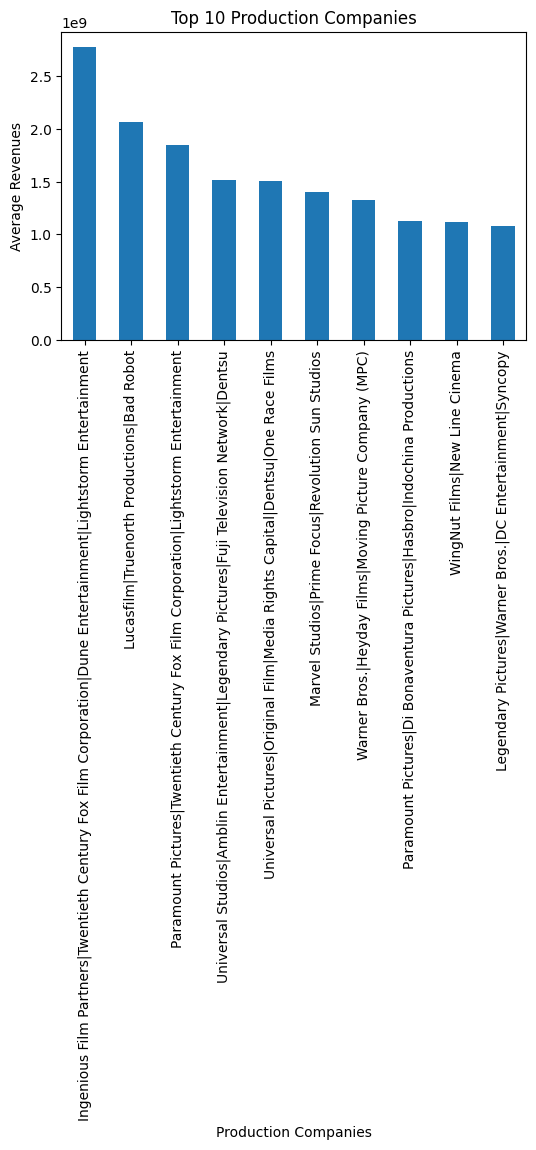

In [39]:
# Plotting the top 10 production companies
plot_bar(companys_revenue, 'Top 10 Production Companies', 'Production Companies', 'Average Revenues')

I calcluated the mean revenue for each production company , then i srted them, and selected top 10 companies with the highest average revenue.

#### Result:

Based on the analysis, it seems that the production company 
"Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment with avarage revenue of 2.781506e+09 "
had the highest revenue among other production companies.(Movies produced by this company tend to have higher revenues compared to other production companies).

There is an important role for production companies in the financial success of movies and identifying potential patterns or trends in revenue generation across different companies.

 - But also, Analyzing the movies produced by their genres, budgets, and marketing strategies, could provide a deeper understanding of their success in generating high revenue. 
 
 


#### Research Question 3:  How has the average runtime of movies changed over the years?


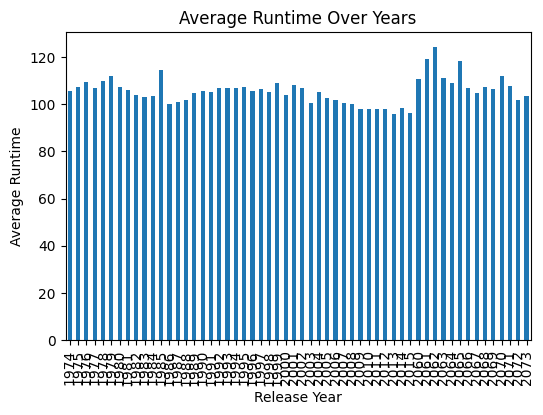

In [40]:
# Calculating the average runtime for each release year
avg_runtime = df.groupby('release_year')['runtime'].mean()

# Plotting the average runtime.
plot_bar(avg_runtime, 'Average Runtime Over Years', 'Release Year', 'Average Runtime')


In [41]:
# filter years because it is illogical for years such as 2073 and 2072 to exist.
# remove years after 2024 to get logical results 
df = df[df['release_year'] <= 2024]

# Print to verify the filtering
print(df['release_year'].value_counts())

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1976     47
1974     47
1975     44
Name: release_year, dtype: int64


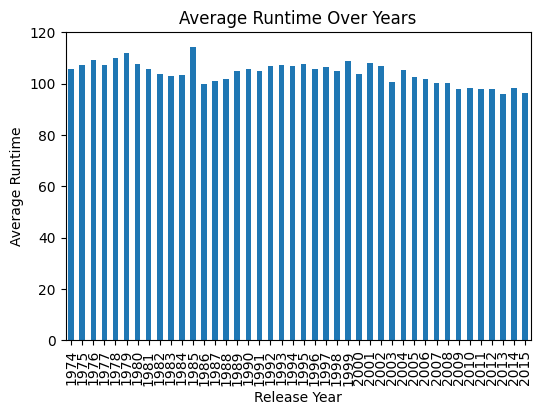

In [42]:
#After cleaning the data

# Calculating the average runtime for each release year
avg_runtime = df.groupby('release_year')['runtime'].mean()

# Plotting the average runtime.
plot_bar(avg_runtime, 'Average Runtime Over Years', 'Release Year', 'Average Runtime')



#### Results:

There isn't a significant variation in the average runtime of movies across different years.

Furthermore, analyzing specific movie genres individually may reveal more subtle trends in movies lengths. It can also provide more details about the factors that influence runtime decisions in the film industry.

### Limitations:

- Some columns contain missing values, which have been addressed by filling in some and dropping others with a significant number of missing values.

- Further research or additional data sources are required to validate the results and delve into more intricate relationships.

### Conclusion:

1. Relationship between Popularity and Revenue:
   -  A positive correlation exists between a film's popularity and its revenues.
   -  Understanding audience preferences is also important to achieve financial success in the film industry.

2. Impact of Production Companies on Revenue:
   - The influence of production companies on movie revenue is evident, as evidenced by the top 10 companies with the highest average revenue.
   - Understanding the role of production companies in shaping revenue outcomes is crucial, with potential implications for industry strategies being of paramount importance.
   
3. Trends in Average Runtime Over Years:
   - The average runtime of movies has remained relatively stable over the years.
   - Further analysis of genre-specific trends in movie lengths could provide deeper insights into this aspect.

In [67]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 578083 bytes to Investigate_a_Dataset.html
